# Importing Libraries

In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

# Loading Datasets

In [2]:
#Reading Train Data
train = pd.read_csv("HandChars32_150_Train.txt", sep = "#")

In [3]:
#Displaying DataFrame
train

,PatN,PatType,PatProb,SizeH,SizeW,Data
0,0,0,10,32,32,0000000000000001100000000000000000000000000000...
1,0,0,10,32,32,0000000000000000001000000000000000000000000000...
2,0,0,10,32,32,0000000000000000000010000000000000000000000000...
3,0,0,10,32,32,0000000000000000000010000000000000000000000000...
4,0,0,9,32,32,0000000000000000000001100000000000000000000000...
...,...,...,...,...,...,...
4195,27,0,10,32,32,0001110000000000000000000000000001111111111111...
4196,27,0,10,32,32,0000000000000000000011110111110000001100001111...
4197,27,0,10,32,32,0000000110000000000000000000000000010011000000...
4198,27,0,10,32,32,0000000000000000000000000000000000000011000000...


In [4]:
#Reading Test Data
test = pd.read_csv("HandChars32_50_Test.txt", sep = "#")

In [5]:
#Displaying Test Data
test

,PatN,PatType,PatProb,SizeH,SizeW,Data
0,0,0,10,32,32,0000000000000000000001111000000000000000000000...
1,0,0,10,32,32,0000000000000000000000000000110000000000000000...
2,0,0,10,32,32,0000000000000000110000000000000000000000000000...
3,0,0,10,32,32,0000000000000000001000000000000000000000000000...
4,0,0,10,32,32,0000000000000000000001000000000000000000000000...
...,...,...,...,...,...,...
1395,27,1,10,32,32,0000000000000000110000000000000000000000000000...
1396,27,1,10,32,32,0000000000011111000000000000000000000000011111...
1397,27,1,10,32,32,0000000000000000000000000001110000000000000000...
1398,27,1,10,32,32,0001000000000000000000000000000000111111111111...


# Data Visualization

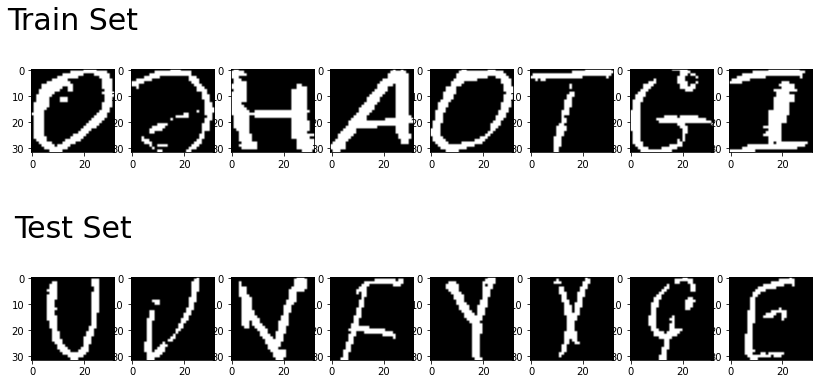

In [6]:
#Creating Figure for Displaying Several Images
fig, axs = plt.subplots(2, 8, figsize = (14, 7))

#Setting Title for Each Axis to distinguish Train and Test Images
axs[0][0].set_title("Train Set\n", size = 30)
axs[1][0].set_title("Test Set\n", size = 30)

#Creating Random Indices for Train and Test Data to Display different Images
rand_train_indices = random.sample(range(len(train)), 8)
rand_test_indices = random.sample(range(len(test)), 8)

#Displaying Train Images
k = 0
for i in rand_train_indices:
    image = []
    for j in train["Data"].values[i]:
        image.append(int(j))
    axs[0][k].imshow(np.array(image).reshape(train["SizeH"].values[i], train["SizeW"].values[i]), cmap = "gray")
    k = k + 1

#Displaying Test Images
t = 0
for i in rand_test_indices:
    image = []
    for j in test["Data"].values[i]:
        image.append(int(j))
    axs[1][t].imshow(np.array(image).reshape(test["SizeH"].values[i], test["SizeW"].values[i]), cmap = "gray")
    t = t + 1

# Extracting and Reshaping Datasets

In [7]:
#Creating Function to Extract Data
def extract(data):
    #Extracting Image Data
    image_data = []
    for i in range(len(data)):
        image = []
        for j in data["Data"].values[i]:
            image.append(int(j))
        image_data.append(np.array(image).reshape(data["SizeH"].values[i], data["SizeW"].values[i]))
  
    #Extracting Image Labels
    image_labels = []
    for i in range(len(data)):
        image_labels.append(int(data["PatN"].values[i]))
    
    #Returning Image Data and their Corresponding Labels
    return np.array(image_data, dtype = "uint8"), np.array(image_labels, dtype = "uint8")

In [8]:
#Extracting Train Images and Labels
train_data, train_labels = extract(train)

In [9]:
#Extracting Test Images and Labels
X_test, y_test = extract(test)

In [10]:
#Giving 24% of Train Data to Validation Data in order to Evaluate Model during training and Prevent Overfitting
X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size = 0.24, random_state = 42)

In [11]:
#Checking Lengths of All Data which will be used in Model Training and Evaluation
print("Train Data:", len(y_train))
print("Validation Data:", len(y_val))
print("Test Data:", len(y_test))

Train Data: 3192
Validation Data: 1008
Test Data: 1400


In [12]:
#Creating Function to Reshape Input Data (Images) for Modelling
def reshape(data):
    #Reshaping Input Data
    data = data.reshape(data.shape[0], 32, 32, 1)
    #Returning Reshaped Data
    return data

In [13]:
#Reshaping Datasets
X_train = reshape(X_train)
X_val = reshape(X_val)
X_test = reshape(X_test)

In [14]:
#Checking Shapes of All Data which will be used in Model Training and Evaluation
print("Train Data:", X_train.shape)
print("Validation Data:", X_val.shape)
print("Test Data:", X_test.shape)

Train Data: (3192, 32, 32, 1)
Validation Data: (1008, 32, 32, 1)
Test Data: (1400, 32, 32, 1)


In [15]:
#Initializing Label Binarizer
label_binarizer = preprocessing.LabelBinarizer()
#Binarizing Labels of Train, Validation, and Test Data
y_train = label_binarizer.fit_transform(y_train)
y_val = label_binarizer.fit_transform(y_val)
y_test = label_binarizer.fit_transform(y_test)

# Modelling

## First Design

In [16]:
#Initializing Sequential Model
model = Sequential()
#Adding the Convolutional Layer
model.add(Conv2D(32, (5, 5), padding = 'SAME', activation = 'relu', input_shape = (32, 32, 1)))
#Adding Pooling Layer
model.add(MaxPooling2D(pool_size = (2, 2)))
#Adding Dropout layer to prevent Overfitting
model.add(Dropout(0.5))
#Adding Convolutional Layer
model.add(Conv2D(64, (5, 5), padding = 'SAME', activation = 'relu'))
#Adding Pooling Layer
model.add(MaxPooling2D(pool_size = (2, 2)))
#Adding Dropout Layer
model.add(Dropout(0.5))
#Adding Flatten to make image 1 dimensional array
model.add(Flatten())
#Adding Dense Layer
model.add(Dense(256, activation = 'relu'))
#Adding Dropout Layer
model.add(Dropout(0.5))
#Adding Dense Layer
model.add(Dense(28, activation = 'softmax'))
#Printing Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0

In [17]:
#Compiling the Model
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [18]:
#Here, we have 2 callbacks. ModelCheckpoint saves the model during training based on the lowest val_loss value
my_check = ModelCheckpoint('FirstDesignBestModel.h5',
                           monitor = "val_loss",
                           mode = 'min',
                           save_best_only = True,
                           verbose = 1)

In [19]:
#Training the Model and Appending All Parameters to history
history = model.fit(X_train, y_train,
                    epochs = 30,
                    validation_data = (X_val, y_val),
                    validation_steps = 10, 
                    callbacks = [my_check], 
                    verbose = 1)

Epoch 1/30
100/100 [==============================] - ETA: 0s - loss: 1.9579 - accuracy: 0.4389
Epoch 1: val_loss improved from inf to 0.63910, saving model to FirstDesignBestModel.h5
100/100 [==============================] - 24s 216ms/step - loss: 1.9579 - accuracy: 0.4389 - val_loss: 0.6391 - val_accuracy: 0.8452
Epoch 2/30
100/100 [==============================] - ETA: 0s - loss: 0.7946 - accuracy: 0.7594
Epoch 2: val_loss improved from 0.63910 to 0.40804, saving model to FirstDesignBestModel.h5
100/100 [==============================] - 12s 124ms/step - loss: 0.7946 - accuracy: 0.7594 - val_loss: 0.4080 - val_accuracy: 0.8879
Epoch 3/30
100/100 [==============================] - ETA: 0s - loss: 0.4901 - accuracy: 0.8506
Epoch 3: val_loss improved from 0.40804 to 0.28078, saving model to FirstDesignBestModel.h5
100/100 [==============================] - 12s 124ms/step - loss: 0.4901 - accuracy: 0.8506 - val_loss: 0.2808 - val_accuracy: 0.9038
Epoch 4/30
100/100 [==================

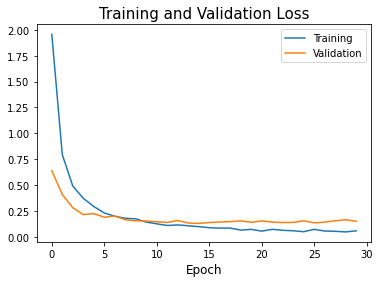

In [20]:
#Plotting Training and Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Loss', size = 15)
plt.xlabel('Epoch', size = 12)
plt.show()

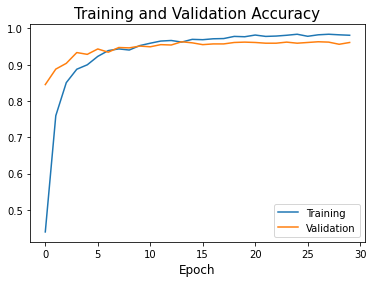

In [21]:
#Plotting Training and Validation Accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Accuracy', size = 15)
plt.xlabel('Epoch', size = 12)
plt.show()

In [22]:
#Loading the Best Model that is Saved during Training Process
saved_model = load_model('FirstDesignBestModel.h5')

In [23]:
#Evaluating Test Data and Printing Test Accuracy and Loss
test_loss, test_accuracy = saved_model.evaluate(X_test, y_test)
print('Test Accuracy :{} Test Loss:{}'.format(test_accuracy, test_loss))

44/44 [==============================] - 1s 29ms/step - loss: 0.7611 - accuracy: 0.8500
Test Accuracy :0.8500000238418579 Test Loss:0.7611434459686279


## Second Design

In [24]:
#Initializing Sequential Model
model = Sequential()
#Adding the Convolutional Layer
model.add(Conv2D(32, (5, 5), padding = 'SAME', activation = 'relu', input_shape = (32, 32, 1)))
#Adding Pooling Layer
model.add(MaxPooling2D(pool_size = (2, 2)))
#Adding Dropout layer to prevent Overfitting
model.add(Dropout(0.5))
#Adding Convolutional Layer
model.add(Conv2D(64, (5, 5), padding = 'SAME', activation = 'relu'))
#Adding Pooling Layer
model.add(MaxPooling2D(pool_size = (2, 2)))
#Adding Dropout Layer
model.add(Dropout(0.5))
#Adding Flatten to make image 1 dimensional array
model.add(Flatten())
#Adding Dense Layer
model.add(Dense(100, activation = 'relu'))
#Adding Dropout Layer
model.add(Dropout(0.5))
#Adding Dense Layer
model.add(Dense(200, activation = 'relu'))
#Adding Dropout Layer
model.add(Dropout(0.5))
#Adding Dense Layer
model.add(Dense(100, activation = 'relu'))
#Adding Dropout Layer
model.add(Dropout(0.5))
#Adding Dense Layer
model.add(Dense(28, activation = 'softmax'))
#Printing Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 8, 8, 64)         

In [25]:
#Compiling the Model
model.compile(Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [26]:
#Here, we have 2 callbacks. ModelCheckpoint saves the model during training based on the lowest val_loss value
my_check = ModelCheckpoint('SecondDesignBestModel.h5',
                           monitor = "val_loss",
                           mode = 'min',
                           save_best_only = True,
                           verbose = 1)

In [27]:
#Training the Model and Appending All Parameters to history
history = model.fit(X_train, y_train,
                    epochs = 30,
                    validation_data = (X_val, y_val),
                    validation_steps = 10, 
                    callbacks = [my_check], 
                    verbose = 1)

Epoch 1/30
100/100 [==============================] - ETA: 0s - loss: 3.3337 - accuracy: 0.0445
Epoch 1: val_loss improved from inf to 3.27931, saving model to SecondDesignBestModel.h5
100/100 [==============================] - 13s 118ms/step - loss: 3.3337 - accuracy: 0.0445 - val_loss: 3.2793 - val_accuracy: 0.1151
Epoch 2/30
100/100 [==============================] - ETA: 0s - loss: 3.1338 - accuracy: 0.0946
Epoch 2: val_loss improved from 3.27931 to 2.75413, saving model to SecondDesignBestModel.h5
100/100 [==============================] - 12s 117ms/step - loss: 3.1338 - accuracy: 0.0946 - val_loss: 2.7541 - val_accuracy: 0.3194
Epoch 3/30
100/100 [==============================] - ETA: 0s - loss: 2.6874 - accuracy: 0.1858
Epoch 3: val_loss improved from 2.75413 to 2.08103, saving model to SecondDesignBestModel.h5
100/100 [==============================] - 12s 115ms/step - loss: 2.6874 - accuracy: 0.1858 - val_loss: 2.0810 - val_accuracy: 0.5060
Epoch 4/30
100/100 [===============

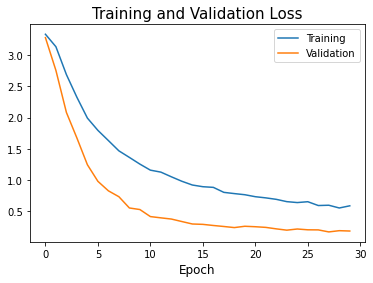

In [28]:
#Plotting Training and Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Loss', size = 15)
plt.xlabel('Epoch', size = 12)
plt.show()

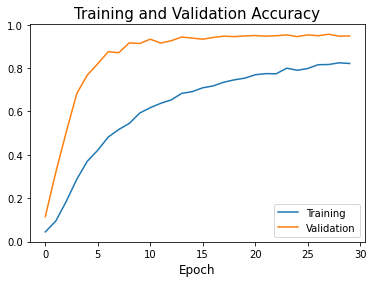

In [29]:
#Plotting Training and Validation Accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Accuracy', size = 15)
plt.xlabel('Epoch', size = 12)
plt.show()

In [30]:
#Loading the Best Model that is Saved during Training Process
saved_model = load_model('SecondDesignBestModel.h5')

In [31]:
#Evaluating Test Data and Printing Test Accuracy and Loss
test_loss, test_accuracy = saved_model.evaluate(X_test, y_test)
print('Test Accuracy :{} Test Loss:{}'.format(test_accuracy, test_loss))

44/44 [==============================] - 1s 29ms/step - loss: 0.6303 - accuracy: 0.8471
Test Accuracy :0.8471428751945496 Test Loss:0.6303238272666931


# Extra

In the Train Dataset, All Pattern Types are 0. We can also observe it from below code written with groupby function of PanDas.

In [32]:
train.groupby("PatType").count()[["Data"]]

,Data
PatType,
0,4200


However, in Test Data, we have several Pattern Types which are not trained in the model.

In [33]:
test.groupby("PatType").count()[["Data"]]

,Data
PatType,
0,1207
1,182
2,9
3,2


So, we need to take Data having only 0 Pattern Types from Test Data and Evaluate model using those images.

In [34]:
#Taking Portion of Test Data having Pattern Type 0
test_PT0 = test[test["PatType"] == 0]

In [35]:
#Checking Number of Pattern Types in Test Data again
test_PT0.groupby("PatType").count()[["Data"]]

,Data
PatType,
0,1207


In [36]:
#Extracting Images and Labels from Data
test_X, test_y = extract(test_PT0)
#Reshaping Data for Evaluation
test_X = reshape(test_X)
#Binarizing Labels
test_y = label_binarizer.fit_transform(test_y)

In [37]:
#Loading the Best Model that is Saved during First Desing Training Process
saved_model = load_model('FirstDesignBestModel.h5')

In [38]:
#Evaluating Test Data and Printing Test Accuracy and Loss
test_loss, test_accuracy = saved_model.evaluate(test_X, test_y)
print('Test Accuracy :{} Test Loss:{}'.format(test_accuracy, test_loss))

38/38 [==============================] - 1s 29ms/step - loss: 0.4006 - accuracy: 0.9064
Test Accuracy :0.9063794612884521 Test Loss:0.4006054997444153


In [39]:
#Loading the Best Model that is Saved during First Desing Training Process
saved_model = load_model('SecondDesignBestModel.h5')

In [40]:
#Evaluating Test Data and Printing Test Accuracy and Loss
test_loss, test_accuracy = saved_model.evaluate(test_X, test_y)
print('Test Accuracy :{} Test Loss:{}'.format(test_accuracy, test_loss))

38/38 [==============================] - 1s 29ms/step - loss: 0.3604 - accuracy: 0.9105
Test Accuracy :0.9105219841003418 Test Loss:0.3603803217411041
